# <center> **Coded Apertures: 2D Image Recostruction Test 2**<center>

**Libraries**

In [2]:
import numpy as np
from matplotlib.colors import ListedColormap as lc

import plot_module as plot
import maskpattern as mp
import codedmaskinterface as cmi
import codedapertureimaging as cai

np.set_printoptions(precision=2, suppress=False)

In [ ]:
import importlib
importlib.reload(plot)

## **2D URA/MURA Masks**

**Sky Simulation**

In [7]:
sky_img_shape = mp.URAMaskPattern(4).prime_pair

sources_flux = [30, 50, 70]
sources_pos = [(np.random.randint(0, sky_img_shape[0]), np.random.randint(0, sky_img_shape[1]))
               for _ in range(len(sources_flux))]
sky_background_rate = 2

args = (sky_img_shape, sources_flux, sources_pos, sky_background_rate)

In [11]:
sky_image, sky_background = cai.sky_image_simulation(*args)

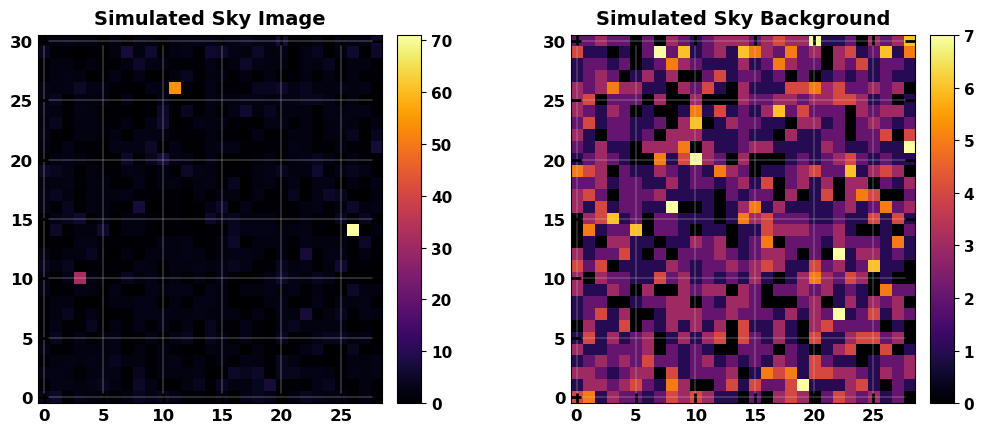

In [13]:
flag = True

if flag:
    if not sky_background_rate: sky_background = np.zeros(sky_img_shape)
    plot.image_plot([sky_image, sky_background],
                    ["Simulated Sky Image", "Simulated Sky Background"],
                    cbarcmap=["inferno", "inferno"])

### **URA Mask Pattern**

**Sky Reconstruction Simulation: mask with no padding**

**Mask Interface**

**Tests**

### **MURA Mask Pattern**

**Sky Reconstruction Simulation: mask with no padding**

**Mask Interface**

**Tests**